### Análise de Dados - job_games

Por maior conveniência para a utilização de pacotes, optei por fazer um Notebook separado para a EDA

In [23]:
#Importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import requests
import io
warnings.filterwarnings("ignore")



In [21]:
#Para filtrar as urls
from urllib.parse import urlparse

from publicsuffix2 import get_public_suffix
from publicsuffix2 import PublicSuffixList

In [22]:
#Detectando idiomas

from langdetect import detect

In [4]:
#Importando o csv
df = pd.read_csv('job_bioinfo_csv/bioinf_vagas.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type
0,0,0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job
1,1,1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job
2,2,2,2,http://diffbot.com/entity/JOB1570298833,en,JOB1570298833,1486437231,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",http://www.nature.com/naturejobs/science/jobs/...,NaN,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",Job
3,3,3,3,http://diffbot.com/entity/JOB2313411533,en,JOB2313411533,1629620706,Postdoctoral Fellow in Bioinformatics and/or G...,https://www.nature.com/naturecareers/job/postd...,"Must hold a Ph.D. degree, with publications in...",NaN,We are looking for enthusiastic postdoctoral f...,NaN,We are looking for enthusiastic postdoctoral f...,Postdoctoral Fellow in Bioinformatics and/or G...,Job
4,4,4,4,http://diffbot.com/entity/JOB2513853425,en,JOB2513853425,1563630178,"Postdoctoral Position in Bioinformatics, Micro...",https://www.nature.com/naturecareers/job/postd...,NaN,NaN,Work group:\nInstitute of Virology\nArea of re...,NaN,Work group:\nInstitute of Virology\nArea of re...,"Postdoctoral Position in Bioinformatics, Micro...",Job


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.2     2012 non-null   int64 
 1   Unnamed: 0       2012 non-null   int64 
 2   Unnamed: 0.1     2012 non-null   int64 
 3   diffbotUri       2012 non-null   object
 4   humanLanguage    2012 non-null   object
 5   id               2012 non-null   object
 6   lastCrawlTime    2012 non-null   int64 
 7   name             2012 non-null   object
 8   pageUrl          2012 non-null   object
 9   requirements     442 non-null    object
 10  resolvedPageUrl  253 non-null    object
 11  summary          2012 non-null   object
 12  tasks            559 non-null    object
 13  text             2012 non-null   object
 14  title            2012 non-null   object
 15  type             2012 non-null   object
dtypes: int64(4), object(12)
memory usage: 251.6+ KB


### Vamos verificar os sites que mais saíram resultados

In [6]:
#Trexo retirado de utils_url
urls = df.pageUrl.values

def clean_url(urls):
    psl = PublicSuffixList()
    ##Removo prefixo
    urls_cleaned = []
    for url in urls:
        domain = urlparse(url).netloc
        domain = domain.replace('www.', '')
        urls_cleaned.append(domain)
    ## Removo sufixo e prefixo de caminho
    urls_cleaned_2 = []
    for url in urls_cleaned:
        urls_cleaned_2.append(psl.get_public_suffix(url).replace(psl.get_tld(url), '')[:-1])

    return urls_cleaned_2

In [7]:
df['urlCleaned'] = clean_url(urls)


<AxesSubplot:>

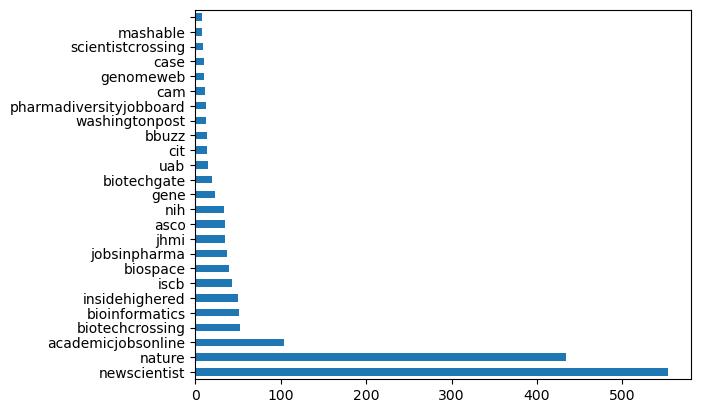

In [8]:
df['urlCleaned'].value_counts()[:25].plot(kind='barh')

## Verificando o tamanho dos textos

In [9]:
df['word_count'] = df['text'].str.count(' ') + 1

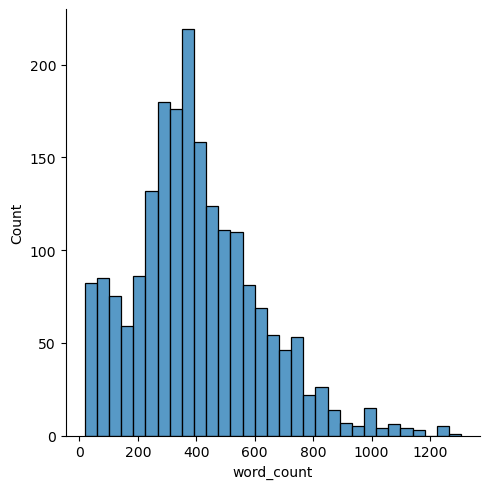

In [10]:
sns.displot(df['word_count'])
plt.show()

In [11]:
#Removendo os outliers
tam = []
for index, row in df.iterrows():
    tam.append(len(row.text))
    
df['tam'] = tam

<AxesSubplot:ylabel='word_count'>

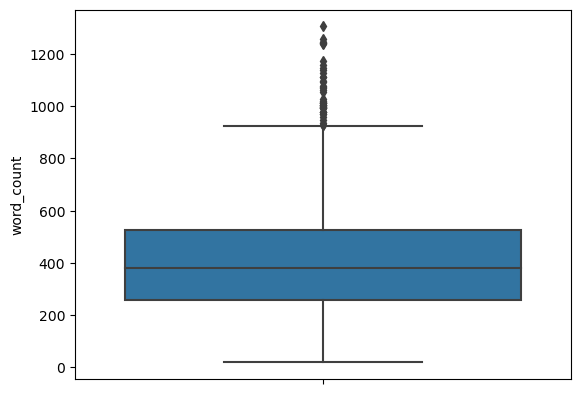

In [12]:
sns.boxplot(y = df['word_count'])

<AxesSubplot:ylabel='tam'>

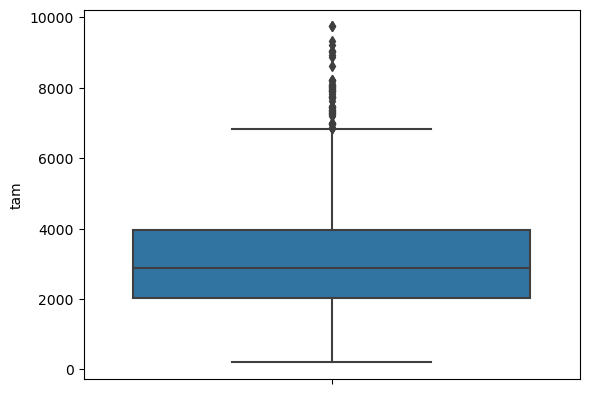

In [13]:
sns.boxplot(y = df['tam'])

In [14]:
df.loc[df['word_count']>1000].head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,urlCleaned,word_count,tam
33,33,34,34,http://diffbot.com/entity/JOB32453303245,en,JOB32453303245,1544974973,Postdoc in in Cancer Bioinformatics in the Por...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=66...,Postdoc in in Cancer Bioinformatics in the Por...,NaN,Postdoc in in Cancer Bioinformatics in the Por...,Postdoc in in Cancer Bioinformatics in the Por...,Job,nature,1258,8919
41,41,42,42,http://diffbot.com/entity/JOB39337860083,en,JOB39337860083,1550065459,Postdoc in Bioinformatics in the Gorodkin lab,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,A two-year Postdoc position is available in th...,NaN,A two-year Postdoc position is available in th...,Postdoc in Bioinformatics in the Gorodkin lab,Job,nature,1099,7994
52,52,53,53,http://diffbot.com/entity/JOB47789923289,en,JOB47789923289,1635101971,Bioinformatics Core Manager of the Omics Data ...,https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,\nComputational sciences applied to biology an...,Coordination and maintenance of the state-of-t...,\nComputational sciences applied to biology an...,Bioinformatics Core Manager of the Omics Data ...,Job,nature,1011,7755
97,97,98,98,http://diffbot.com/entity/JOB85504973771,en,JOB85504973771,1604865070,"Postdoc in Biochemistry, Bioinformatics, and S...",https://www.nature.com/naturecareers/job/postd...,"Protein sequence and structure clustering,Pyth...",NaN,We are looking for a postdoctoral researcher w...,NaN,We are looking for a postdoctoral researcher w...,"Postdoc in Biochemistry, Bioinformatics, and S...",Job,nature,1113,8110
100,100,102,102,http://diffbot.com/entity/JOB87963999198,en,JOB87963999198,1636056694,Staff Fellow – Bioinformatics Reviewer,https://www.nature.com/naturecareers/job/staff...,NaN,NaN,Individualized Cell and Gene Therapies and Imm...,Developing and implementing bioinformatics dat...,Individualized Cell and Gene Therapies and Imm...,Staff Fellow – Bioinformatics Reviewer,Job,nature,1013,7730


In [15]:
for index, row in df.iterrows():
    if(row.word_count > 1000):
        df = df.drop(index)

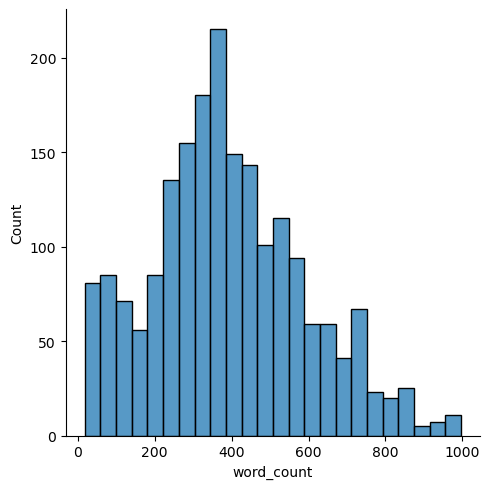

In [16]:
sns.displot(df['word_count'])
plt.show()

In [17]:
print("O tamanho médio dos textos é de {:.0f} palavras".format(df['word_count'].mean()))

O tamanho médio dos textos é de 390 palavras


## Verificando os idiomas 

In [18]:
df['language'] = df['text'].apply(detect)

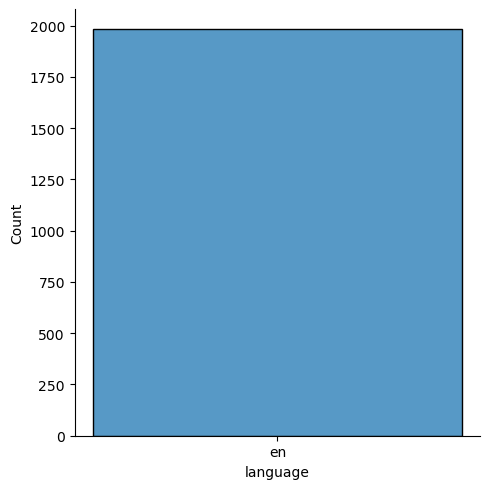

In [19]:
sns.displot(df['language'])
plt.show()